## Good *pass_loss_dB*
### Low-Pass IIR Filter

- It is not possible to set *pass_loss_dB* to $0$
```
20 * np.log10(np.abs(1))
```
yields 0
- It is not possible to set *pass_loss* (direct ratio) to $1$
- Look at [/examples/lti_filters/iir/params/bad_pass_loss_dB.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/iir/params/bad_pass_loss_dB.ipynb) for the error message
- So, it can be set to a very small positive number ($0.001$ in this case)
- Loss in pass-band is less compared to [/examples/lti_filters/iir/lpf.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/iir/lpf.ipynb)

Next example: [/examples/lti_filters/iir/params/good_stop_loss_dB.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/iir/params/good_stop_loss_dB.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../../../') # To be able to reach functions
from functions import fft, lti
from scipy import signal

In [2]:
pass_freqs = [.45]
stop_freqs = [.55]
pass_loss_dB = 0.001
stop_loss_dB = 30
numerator_coeffs, denum_coeffs = signal.iirdesign(pass_freqs, stop_freqs, pass_loss_dB, stop_loss_dB)
lti.equation(numerator_coeffs, denum_coeffs)

<IPython.core.display.Latex object>

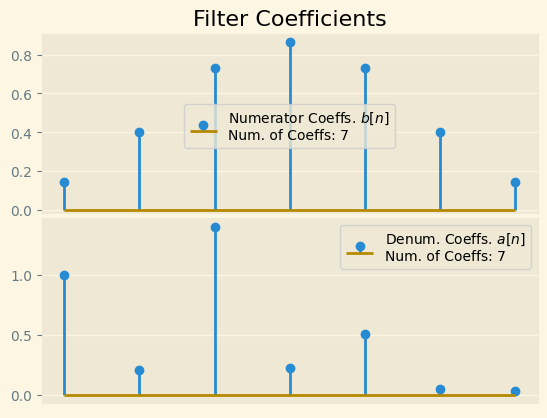

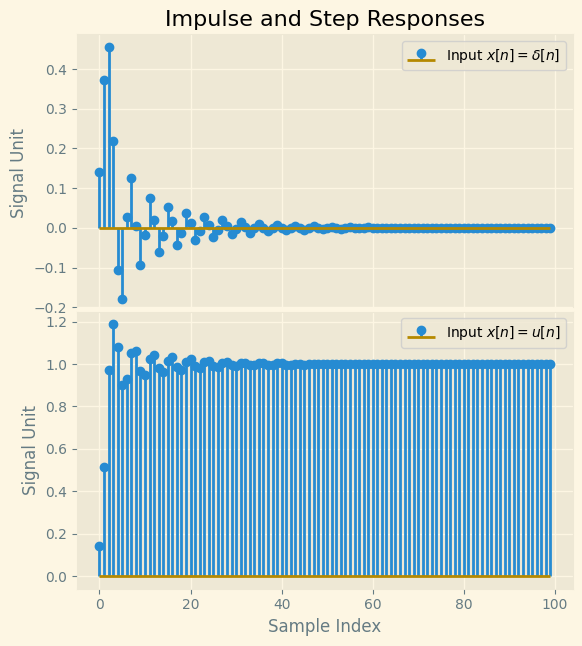

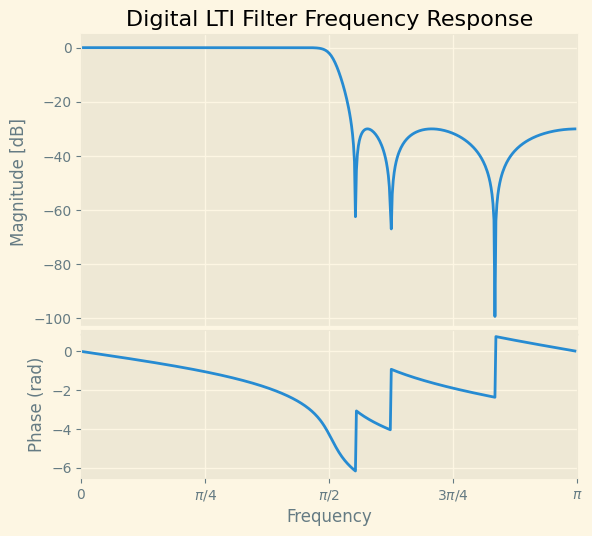

In [3]:
lti.plot_filter_coefficients(numerator_coeffs, denum_coeffs)
lti.plot_impulse_and_step_responses(numerator_coeffs, denum_coeffs)
lti.bode(numerator_coeffs, denum_coeffs)

In [4]:
first_time = 0 # s
last_time = 3 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq)

zero_freq = 0 # Hz
low_freq = 12 # Hz
cutoff_freq = 25 # Hz
high_freq = 38 # Hz
very_high_freq = 49.5 # Hz

common_amplitude = 1
common_phase = 0 # rad
common_offset = 0

signal_zero_freq = fft.get_signal(zero_freq, 0, common_phase, common_amplitude, time)
signal_low_freq = fft.get_signal(low_freq, common_amplitude, common_phase, common_offset, time)
signal_cutoff_freq = fft.get_signal(cutoff_freq, common_amplitude, common_phase, common_offset, time)
signal_high_freq = fft.get_signal(high_freq, common_amplitude, common_phase, common_offset, time)
signal_very_high_freq = fft.get_signal(very_high_freq, common_amplitude, common_phase, common_offset, time)

superposition_signal = signal_zero_freq + signal_low_freq + signal_cutoff_freq + signal_high_freq + signal_very_high_freq

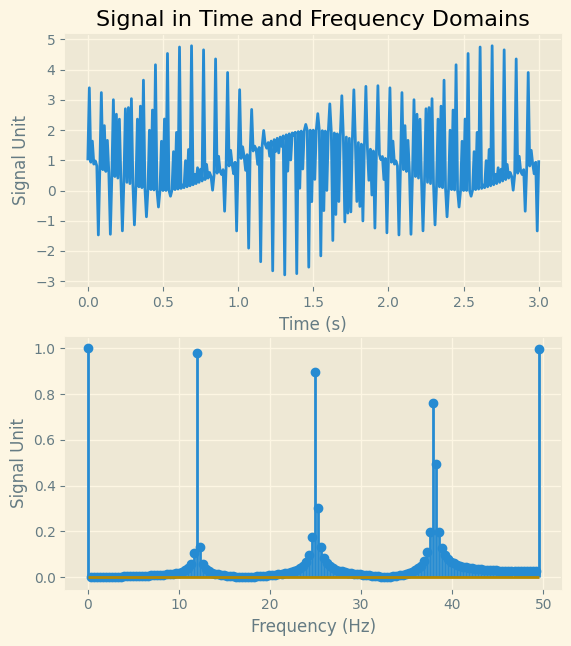

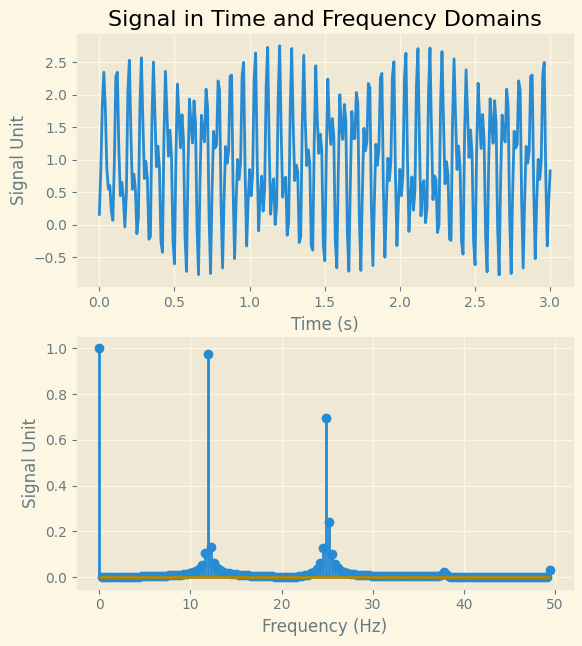

In [5]:
fft.plot_signal_and_fft(time, superposition_signal, samp_freq)
filtered_signal = signal.lfilter(numerator_coeffs, denum_coeffs, superposition_signal)
fft.plot_signal_and_fft(time, filtered_signal, samp_freq)

Next example: [/examples/lti_filters/iir/params/good_stop_loss_dB.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/lti_filters/iir/params/good_stop_loss_dB.ipynb)